In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
df=pd.read_excel("Electricity Pricing.xlsx")

In [7]:
df

,Time Period,Electricity Price
0,2019-01-01,7.67
1,2019-02-01,7.75
2,2019-03-01,7.82
3,2019-04-01,8.03
4,2019-05-01,8.95
5,2019-06-01,8.51
6,2019-07-01,8.80
7,2019-08-01,7.22
8,2019-09-01,7.11
9,2019-10-01,6.80


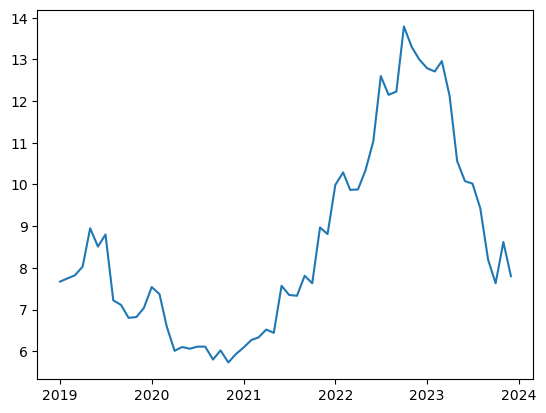

In [9]:
plt.plot(df['Time Period'],df['Electricity Price'])

### Unable to determine if there is cyclical trend due to 2020 COVID impact.

### Attempt to decompose it.

In [25]:
# Assuming 'Time Period' is a column in your DataFrame
df['Time Period'] = pd.to_datetime(df['Time Period'])
df = df.set_index('Time Period')

results = seasonal_decompose(df['Electricity Price'], model='multiplicative')


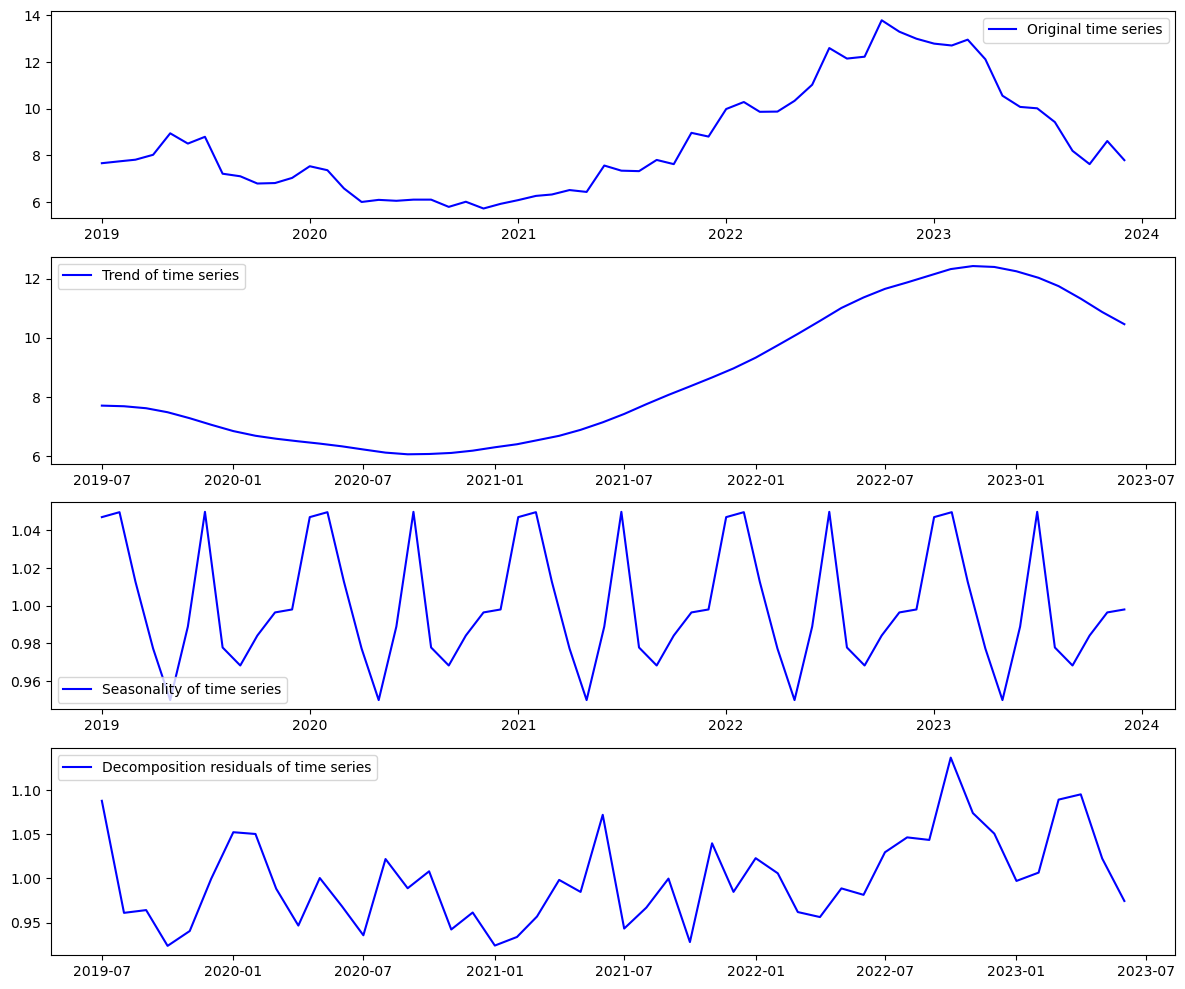

In [26]:
trend_estimate    = results.trend
periodic_estimate = results.seasonal
residual = results.resid
 
plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(df['Electricity Price'],label='Original time series', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_estimate,label='Trend of time series',color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(periodic_estimate,label='Seasonality of time series',color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Decomposition residuals of time series',color='blue')
plt.legend(loc='best')
plt.tight_layout()

### Documentation:

#### Original Time Series (plt.subplot(411)):
This subplot shows the original time series data (df['Electricity Price'] in this case). It gives you an overview of the overall trend, seasonality, and any other patterns present in the raw data.

#### Trend Component (plt.subplot(412)):
This subplot displays the estimated trend component of the time series. The trend represents the long-term movement or direction in the data, helping you identify the underlying pattern without the shorter-term fluctuations.

#### Seasonal Component (plt.subplot(413)):
Here, you see the estimated seasonal component of the time series. Seasonality represents recurring patterns that repeat at fixed intervals, such as daily, monthly, or yearly patterns. This plot helps you understand the cyclic behavior of the data.

#### Decomposition Residuals (plt.subplot(414)):
The last subplot shows the residuals or errors obtained from the decomposition process. Residuals represent the part of the data that the model was unable to explain with the trend and seasonal components. Examining the residuals can help identify any remaining patterns or irregularities in the data that the model did not capture.

#### Interpretation:
Trend: Look for the long-term movement or direction in the data. This can help you identify upward or downward trends.

#### Seasonality:
Identify recurring patterns in the data that repeat at fixed intervals. This is crucial for understanding cyclic behavior.

#### Residuals:
Check for any remaining patterns or irregularities that the decomposition did not capture. Random or white noise in the residuals is a good sign that the model is doing a decent job capturing the underlying patterns.

By examining these components, you gain insights into the various aspects of your time series data and can make informed decisions about modeling or forecasting.

## Time Series Forecasting

In [28]:
df

,Electricity Price
Time Period,
2019-01-01,7.67
2019-02-01,7.75
2019-03-01,7.82
2019-04-01,8.03
2019-05-01,8.95
2019-06-01,8.51
2019-07-01,8.80
2019-08-01,7.22
2019-09-01,7.11


In [55]:
df2=df2.reset_index()
df2 = df2.rename(columns={'Time Period': 'ds', 'Electricity Price': 'y'})

m = Prophet(yearly_seasonality=False, weekly_seasonality=False)
m.fit(df2)

17:12:54 - cmdstanpy - INFO - Chain [1] start processing
17:12:54 - cmdstanpy - INFO - Chain [1] done processing


In [56]:
future = m.make_future_dataframe(periods=1825)
future.tail()


,ds
1880,2028-11-25
1881,2028-11-26
1882,2028-11-27
1883,2028-11-28
1884,2028-11-29


In [57]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1880,2028-11-25,15.862853,13.390327,18.055507
1881,2028-11-26,15.865523,13.499905,18.152814
1882,2028-11-27,15.868192,13.718310,18.117355
1883,2028-11-28,15.870861,13.527970,18.294455
1884,2028-11-29,15.873531,13.630773,18.164836


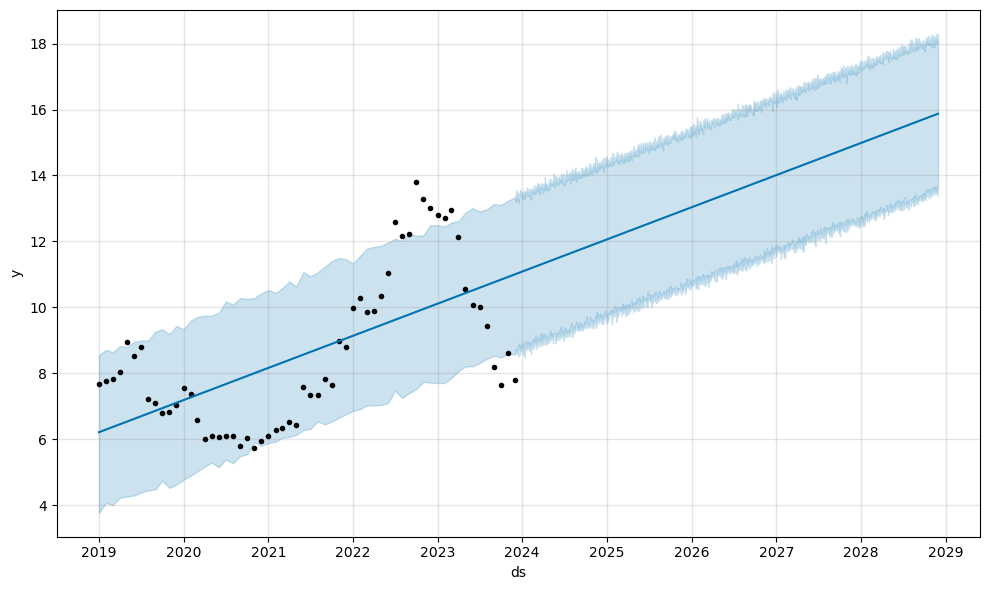

In [58]:
# Python
fig1 = m.plot(forecast)

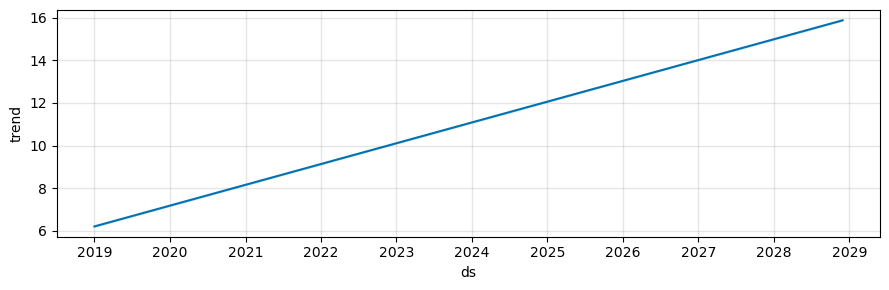

In [59]:
# Python
fig2 = m.plot_components(forecast)

In [60]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [61]:
# Python
plot_components_plotly(m, forecast)

In [62]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_excel('forecast_output.xlsx', index=False)